In [1]:
# Source https://www.codearmo.com/python-tutorial/getting-stock-prices-pandas
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
from io import StringIO as SIO
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from IPython.display import Image as img

In [2]:
# Source https://www.codearmo.com/python-tutorial/getting-stock-prices-pandas

def get_stock_data(startdate_yyyymd, enddate_yyyymd, symbol, source):

    #start of the data
    start  = startdate_yyyymd

    #last data point to download      
    end    = enddate_yyyymd

    # name of the stock symbol
    symbol = f'{symbol}' 
    ##source of the data
    source = f'{source}'

    # pass in the arguments above to pandas datareader
    data   = web.DataReader(symbol, source, start, end)
    
    return data

In [3]:
startdate = dt.datetime(2019,12,31)
enddate   = dt.datetime(2021,6,13)
source    = 'yahoo'

###################################################################################################################

# Advanced micro device inc Stock dataframe
AMD_StockData = get_stock_data(startdate , enddate, 'AMD', source)

# Advanced micro device inc closing Stock dates dataframe
AMD_CloseData = pd.DataFrame(AMD_StockData['Close'])

###################################################################################################################

# Apple Stock dataframe
AAPL_StockData = get_stock_data(startdate , enddate, 'AAPL', source)

# Apple closing Stock dates dataframe
AAPL_CloseData = pd.DataFrame(AAPL_StockData['Close'])

###################################################################################################################

# Netflix Stock dataframe
NFLX_StockData = get_stock_data(startdate , enddate, 'NFLX', source)

# Netflix closing Stock dates dataframe
NFLX_CloseData = pd.DataFrame(NFLX_StockData['Close'])
###########################################################81########################################################

1. What was the change in price of the stock overtime?

the change in price of the AMD stock overtime was 35.78999710083008,
which is a 78.62477315666615% move from the pre-existing price.


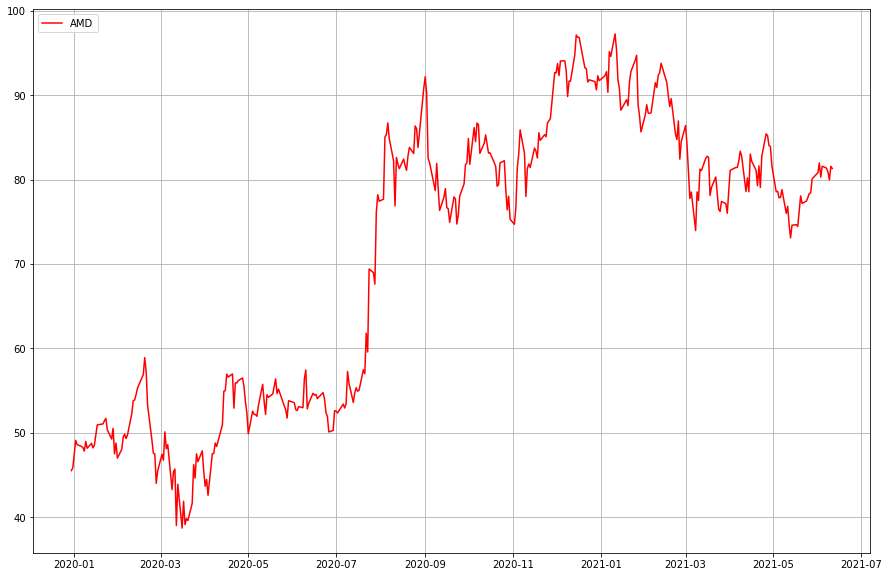

In [4]:
print(f'''1. What was the change in price of the stock overtime?

the change in price of the AMD stock overtime was {AMD_StockData['Close'][len(AMD_StockData['Close'])-1] - AMD_StockData['Close'][0]},
which is a {(AMD_StockData['Close'][len(AMD_StockData['Close'])-1]- AMD_StockData['Close'][0]) / AMD_StockData['Close'][0] * 100}% move from the pre-existing price.''')

plt.figure(figsize = (15, 10))
plt.grid(True)
plt.plot(AMD_StockData['Close'], label = 'AMD', color = 'r')
plt.legend(loc = 2)
plt.show()

2. What was the daily return of the stock on average?

The daily return of the AMD stock on average was 0.06068308887585916 pips 



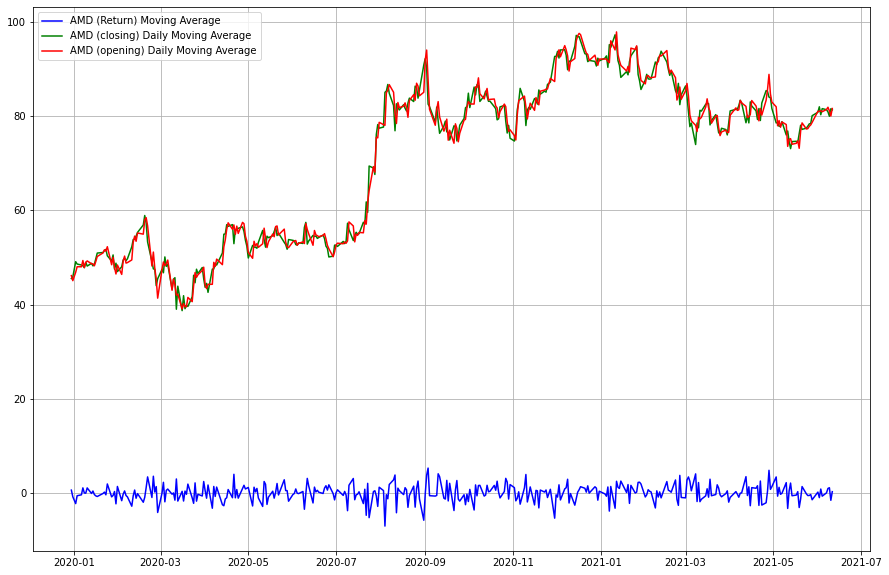

In [5]:
###################################################################################################################

AMD_CloseData['Closing_MA_1']  = AMD_CloseData['Close'].rolling(1, min_periods = 1).mean()

###################################################################################################################

AMD_OpenData = pd.DataFrame(AMD_StockData['Open'])
AMD_OpenData['Opening_MA_1']  = AMD_OpenData['Open'].rolling(1, min_periods = 1).mean()

###################################################################################################################

daily_return_stock_avg = pd.DataFrame(AMD_OpenData['Opening_MA_1'] - AMD_CloseData['Closing_MA_1'], 
                         columns = ['Return'])

###################################################################################################################
print(f'''2. What was the daily return of the stock on average?

The daily return of the AMD stock on average was {daily_return_stock_avg['Return'].mean()} pips \n''')
###################################################################################################################

plt.figure(figsize = (15, 10))
plt.grid(True)
plt.plot(daily_return_stock_avg['Return'], label  = 'AMD (Return) Moving Average', color = 'b')
plt.plot(AMD_CloseData['Closing_MA_1'], label    = 'AMD (closing) Daily Moving Average', color = 'g')
plt.plot(AMD_OpenData['Opening_MA_1'], label     = 'AMD (opening) Daily Moving Average', color = 'r')
plt.legend(loc = 2)
plt.show()

3. What was the moving average of the various stocks?

The moving average of various stock was as follows:



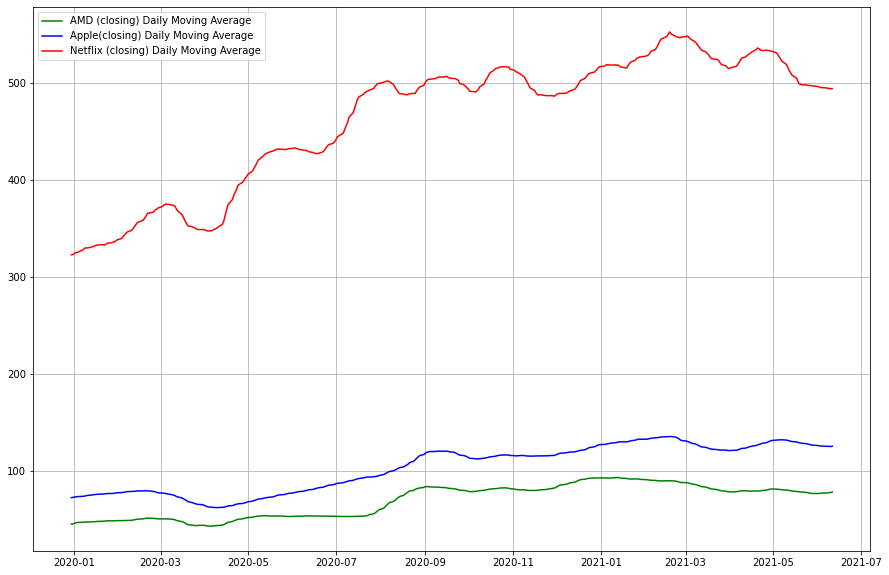

In [6]:

print('''3. What was the moving average of the various stocks?

The moving average of various stock was as follows:\n''')

AMD_CloseData['Closing_MA_21'] = AMD_CloseData['Close'].rolling(21, min_periods = 1).mean()
NFLX_CloseData['Closing_MA_21'] = NFLX_CloseData['Close'].rolling(21, min_periods = 1).mean()
AAPL_CloseData['Closing_MA_21']  = AAPL_CloseData['Close'].rolling(21, min_periods = 1).mean()

plt.figure(figsize = (15, 10))
plt.grid(True)
plt.plot(AMD_CloseData['Closing_MA_21'], label   = 'AMD (closing) Daily Moving Average', color = 'g')
plt.plot(AAPL_CloseData['Closing_MA_21'], label  = 'Apple(closing) Daily Moving Average', color = 'b')
plt.plot(NFLX_CloseData['Closing_MA_21'], label  = 'Netflix (closing) Daily Moving Average', color = 'r')
plt.legend(loc = 2)
plt.show()


4. what was the correlation between different stocks' closing price?

The correlation between Apple and Netflix stock was (0.7917001987346676). This means that,
during the period of (2019-12-31 and 2021-06-01), Apple and Netflix stock had a moderately strong correlation. 



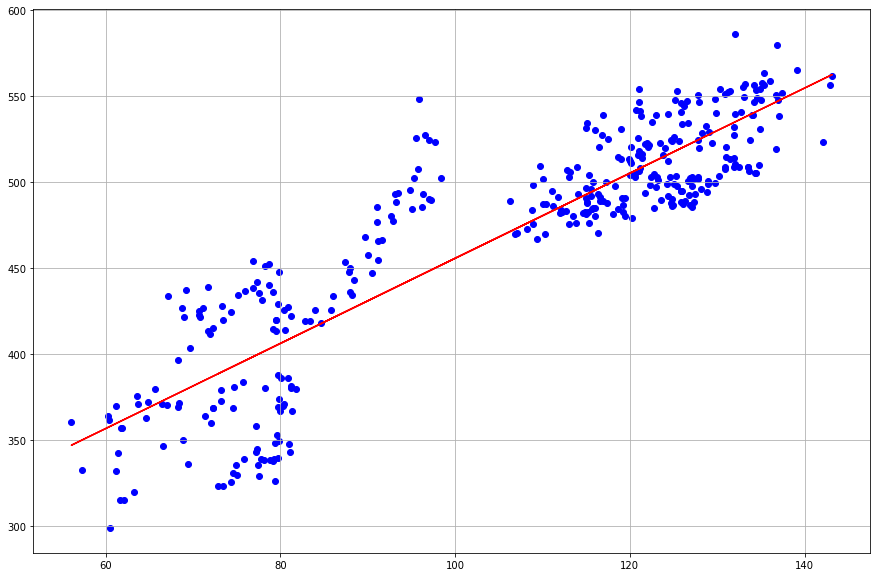

In [7]:
########################################################################################################################
slope, intercept, r_value, p_value, std_err1 = stats.linregress(AAPL_CloseData['Close'], NFLX_CloseData['Close'])
r = r_value ** 2

def predict(x):
    return slope * x + intercept
########################################################################################################################

print(f'''4. what was the correlation between different stocks' closing price?

The correlation between Apple and Netflix stock was ({r}). This means that,
during the period of ({dt.date(2019,12,31)} and {dt.date(2021,6,1)}), Apple and Netflix stock had a moderately strong correlation. 
''')

########################################################################################################################

fitline = predict(AAPL_CloseData['Close'])

plt.figure(figsize = (15, 10))
plt.grid(True)
plt.scatter(AAPL_CloseData['Close'], 
            NFLX_CloseData['Close'], color = 'b')
plt.plot(AAPL_CloseData['Close'],fitline, c = 'r')


5. what was the correlation between different stocks' daily return?

The correlation between Apple and Netflix daily return was (0.23650934315953442). This means that,
during the period of 2019-12-31 and 2021-06-01, Apple and Netflix stock had a weak positive correlation. 



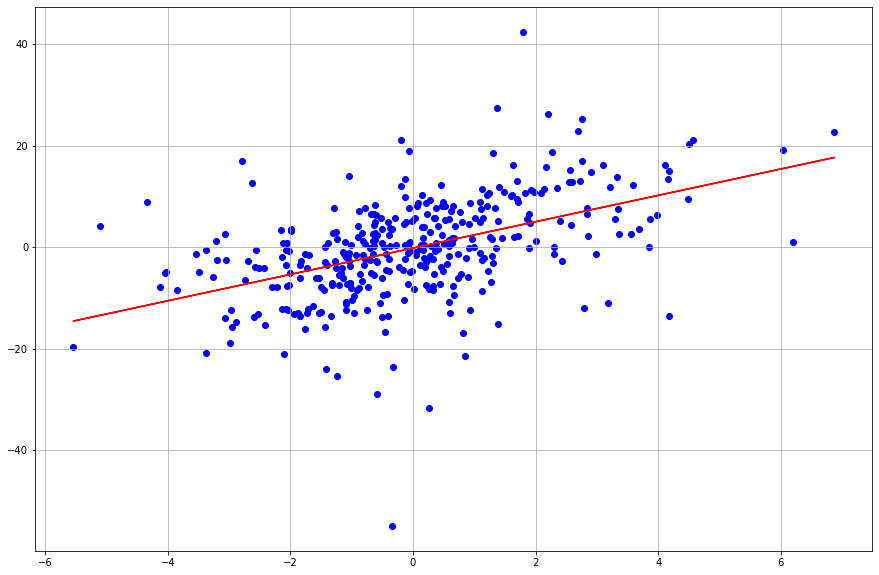

In [8]:
###################################################################################################################

# APPLE
AAPL_CloseData['Closing_MA_1']  = AAPL_CloseData['Close'].rolling(1, min_periods = 1).mean()

# NETFLIX

NFLX_CloseData['Closing_MA_1']  = NFLX_CloseData['Close'].rolling(1, min_periods = 1).mean()

###################################################################################################################

# APPLE
AAPL_OpenData = pd.DataFrame(AAPL_StockData['Open'])
AAPL_OpenData['Opening_MA_1']  = AAPL_OpenData['Open'].rolling(1, min_periods = 1).mean()

# NETFLIX
NFLX_OpenData = pd.DataFrame(NFLX_StockData['Open'])
NFLX_OpenData['Opening_MA_1']  = NFLX_OpenData['Open'].rolling(1, min_periods = 1).mean()

###################################################################################################################

# APPLE
AAPL_drs_avg = pd.DataFrame(AAPL_OpenData['Opening_MA_1'] - AAPL_CloseData['Closing_MA_1'], 
                         columns = ['Return'])

# NETFLIX
NFLX_drs_avg = pd.DataFrame(NFLX_OpenData['Opening_MA_1'] - NFLX_CloseData['Closing_MA_1'], 
                         columns = ['Return'])

###################################################################################################################

slope, intercept, r_value, p_value, std_err2 = stats.linregress(AAPL_drs_avg['Return'], NFLX_drs_avg['Return'])
r5 = r_value ** 2

def predict(x):
    return slope * x + intercept

###################################################################################################################

print(f'''5. what was the correlation between different stocks' daily return?

The correlation between Apple and Netflix daily return was ({r5}). This means that,
during the period of {dt.date( 2019,12,31)} and {dt.date(2021,6,1)}, Apple and Netflix stock had a weak positive correlation. 
''')
###################################################################################################################
fitline = predict(AAPL_drs_avg['Return'])

plt.figure(figsize = (15, 10))
plt.grid(True)
plt.scatter(AAPL_drs_avg['Return'], NFLX_drs_avg['Return'], color = 'b')
plt.plot(AAPL_drs_avg['Return'],fitline, c = 'r')

In [9]:
RiskRatio = AMD_StockData['Close'][len(AMD_StockData['Close'])-1] / AMD_StockData['Close'][0]

print(f'''6. How much value do we put at risk by investing in a particular stock?

if we had invested in AMD stock on the date 2020-12-31, 
we would have a risk reward ratio of (1:{RiskRatio}) on 2021-06-01. 

This means our risk would have been {1 / RiskRatio * 100}% of the total gain value.
''')

6. How much value do we put at risk by investing in a particular stock?

if we had invested in AMD stock on the date 2020-12-31, 
we would have a risk reward ratio of (1:1.7862477315666614) on 2021-06-01. 

This means our risk would have been 55.983276133984596% of the total gain value.



In [10]:
# 7. How can we attempt to predict future stock behaviour?

AMD_CloseData['Actual Price Change'] = AMD_CloseData['Close'].shift(1) 

AMD_CloseData['Change']              = np.log(AMD_CloseData['Close'] / AMD_CloseData['Actual Price Change'])

AMD_CloseData['Volatility']          = AMD_CloseData['Close'].rolling(21, min_periods = 1).std().shift()

AMD_CloseData['Exp Change']          = AMD_CloseData['Close'].shift(1) * AMD_CloseData['Volatility']

AMD_CloseData['Magnitude']           = AMD_CloseData['Actual Price Change'] / AMD_CloseData['Exp Change']

AMD_CloseData = AMD_CloseData.iloc[2:]

# 7. How can we attempt to predict future stock behaviour?

We can attempt to predict the future stock price behaviour using the stock volatility,
and multiplying it to the actual price change for an estimated future price. 
This states that the stock is predicted to fall in the near future.



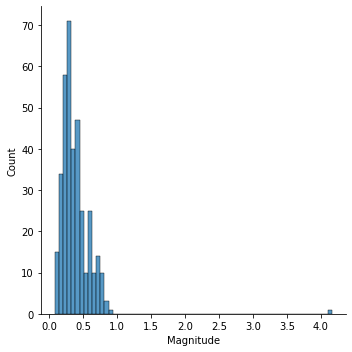

In [11]:
print('''# 7. How can we attempt to predict future stock behaviour?

We can attempt to predict the future stock price behaviour using the stock volatility,
and multiplying it to the actual price change for an estimated future price. 
This states that the stock is predicted to fall in the near future.
''')

sns.displot(AMD_CloseData['Magnitude'])